In [1]:
import investpy
import sqlite3
import json
import datetime
from matplotlib import pyplot as plt
 

`importing all files`

In [2]:
conn = sqlite3.connect('MSFT.db')
print ("Opened database successfully");
conn.execute('''CREATE TABLE MSFT
         (DATE   VARCHAR(30),
       CLOSE    float(10)     NOT NULL);''')
print ("Table created successfully");
conn.close()

Opened database successfully
Table created successfully


`creating the database table`

In [3]:
conn = sqlite3.connect('MSFT.db')
data = investpy.get_stock_historical_data(stock='MSFT', country='United States', 
                        as_json=True, from_date='01/01/2010', to_date='31/12/2020')
#print(data.sort_values(by='Date',ascending=False))
#print(data)
s= json.loads(data)
a= s['historical']

for i in a:
    conn.execute("INSERT INTO MSFT (DATE,CLOSE) \
      VALUES ("+"'"+str(i['date'])+"'"+","+str(i['close'])+" )");

conn.commit()
print ("Records created successfully");
conn.close()

Records created successfully


getting stocks from apple and save it in sql database

In [5]:
import matplotlib
from matplotlib import pyplot as plt
conn = sqlite3.connect('./MSFT.db')
import datetime


print ("Opened database successfully");
a=conn.execute('''SELECT * FROM MSFT;''')
temp1=[]
temp2=[]
for i in a:
    temp1.append(i[0])
    temp2.append(i[1])
conn.close()

Opened database successfully


 `Plot and visualize the data with any library like matplotlib.pyplot`

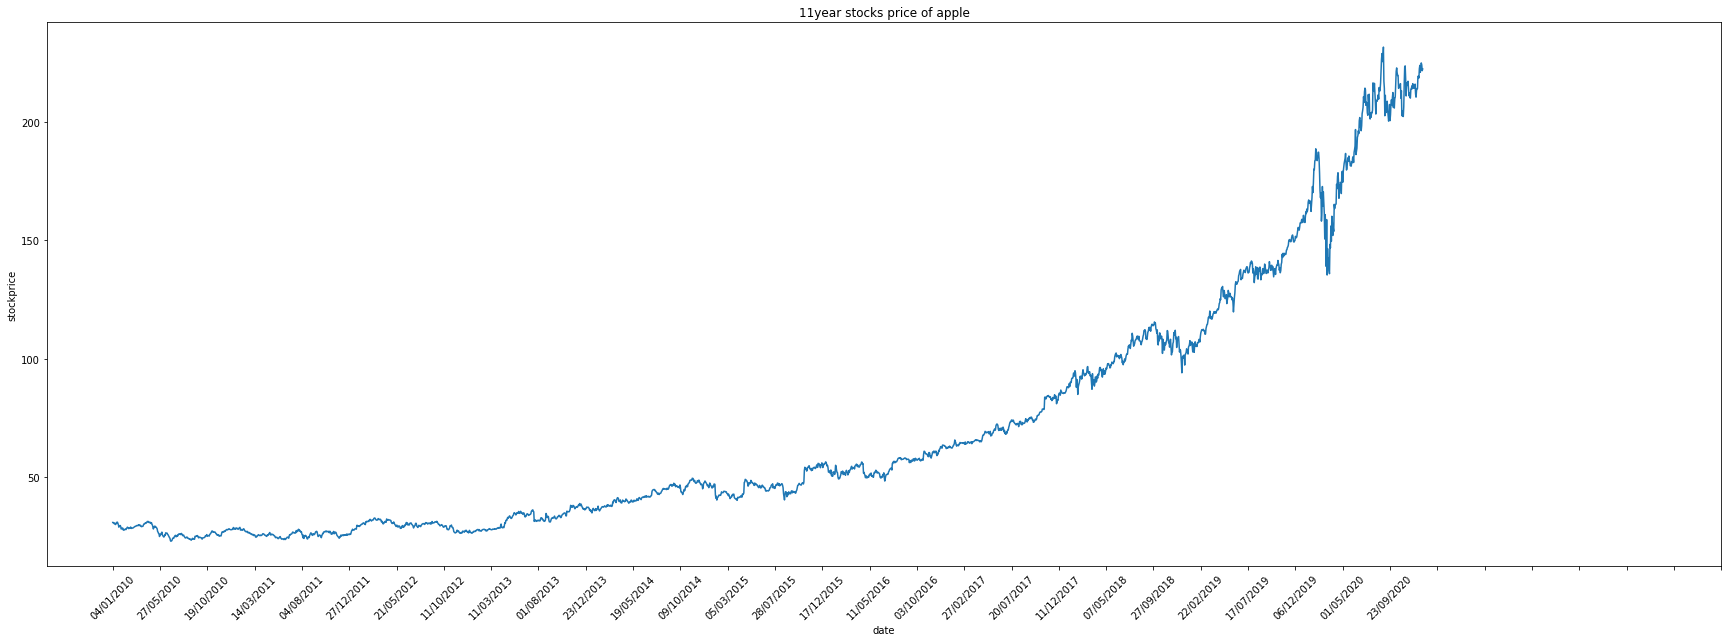

In [6]:
import numpy as np
plt.figure(figsize=(30,10))
plt.plot(np.array(temp1),np.array(temp2))
plt.title("11year stocks price of apple")
plt.xticks(range(0,3500,100),rotation=45)
plt.xlabel("date" )
plt.ylabel("stockprice")
plt.show()



#machine learning

"USING LSTM"

In [26]:
import tensorflow as tf
import math
train_data=temp2
train_data_len= len(train_data)
print(train_data_len)

2770


In [25]:
import investpy
#if need of working with dataframes
search_results = investpy.search_quotes(text='tesla',
                 products=['stocks'],
                 countries=['united states'],
                 n_results=1000)
for search_result in search_results[:1]:
   print(search_result)
   search_result.retrieve_historical_data(from_date='01/01/2010', to_date='01/01/2020')
   print(search_result.data.head())
   #print(search_result.data.values.tolist())
   #for i in search_result.data["Open"].tolist(): 
   #print(i)
   print(search_result.data.sort_values(by='Date',ascending=False)) #sort command
   print(search_result.data.columns.values.tolist())

{"id_": 13994, "name": "Tesla Inc", "symbol": "TSLA", "country": "united states", "tag": "/equities/tesla-motors", "pair_type": "stocks", "exchange": "NASDAQ"}
            Open  High   Low  Close    Volume
Date                                         
2010-06-30  5.16  6.08  4.66   4.77  85971968
2010-07-01  5.00  5.18  4.05   4.39  41149316
2010-07-02  4.60  4.62  3.74   3.84  25709036
2010-07-06  4.00  4.00  3.17   3.22  34396480
2010-07-07  3.28  3.33  3.00   3.16  34624568
             Open   High    Low  Close    Volume
Date                                            
2019-12-31  81.00  84.26  80.42  83.67  51462280
2019-12-30  85.76  85.80  81.85  82.94  63006324
2019-12-27  87.00  87.06  85.22  86.08  49784136
2019-12-26  85.58  86.70  85.27  86.19  53241444
2019-12-24  83.67  85.09  82.54  85.05  40273600
...           ...    ...    ...    ...       ...
2010-07-07   3.28   3.33   3.00   3.16  34624568
2010-07-06   4.00   4.00   3.17   3.22  34396480
2010-07-02   4.60   4.62   3